In [58]:
!pip install --quiet --upgrade comet_ml
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="0EKSrlH9OVngYfgQCrauwqLEt",
                        project_name="mri-interpretation", workspace="polina")

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/polina/mri-interpretation/6aacb9c7ba624c39ba1aad1ffa13435f
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [59]          : (0.0021183013450354338, 1.9672889709472656)
COMET INFO:     train_acc [13]     : (87.16706848144531, 100.0)
COMET INFO:     train_loss [13]    : (0.0017662464168044507, 0.29671707761994864)
COMET INFO:     validate_acc [13]  : (82.69230651855469, 93.26923370361328)
COMET INFO:     validate_loss [13] : (0.15577355335251644, 0.3282117591499208)
COMET INFO:   Others [count]:
COMET INFO:     Name [3] : 3DCNN_baseline_Adam_5e-5_sch_05
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     model graph         : 1
CO

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as torch_data
import torch.nn.functional as F
from torchsummary import summary
import os
import pathlib
from sklearn.model_selection import train_test_split, StratifiedKFold
import torchio
from torch.optim.lr_scheduler import ReduceLROnPlateau
# from torchio.transforms import CropOrPad

%matplotlib inline

ImportError: No module named 'torchio.transforms'

In [3]:
import nilearn
from nilearn import plotting

/home/mri/.local/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/mri/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/mri/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in ver

In [4]:
 torch.cuda.is_available()

True

In [5]:
if torch.cuda.is_available():
  device = torch.device("cuda:1")
else:
  device = torch.device("cpu")

In [6]:
!nvidia-smi

Thu Oct 22 01:20:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:05:00.0 Off |                    0 |
| N/A   29C    P0    27W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P100-PCIE...  Off  | 00000000:08:00.0 Off |                    0 |
| N/A   26C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [ ]:
data_dir = pathlib.Path('/home/datasets/adni')

In [ ]:
# PATH_TO_MRI = '/home/datasets/adni/data'
# behavioral_data = pd.read_csv(data_dir / 'unrestricted_hcp_freesurfer.csv')

In [ ]:
!cd data_dir / 'unrestricted_hcp_freesurfer.csv' && ls

In [ ]:
len(os.listdir(PATH_TO_MRI))

In [ ]:
transform = CropOrPad(
     (180, 180, 180))

In [10]:
imgs = []
for i, idd in enumerate(available_id['id']):
    dir = PATH_TO_MRI
    file= '{}.nii'.format(idd)
    full_path=os.path.join(dir,file)
#     img = nilearn.image.load_img(full_path)
    img = torchio.Image(full_path, torchio.INTENSITY).data
    img_crop = transform(img)
    imgs.append(img_crop)
#     imgs.append(nilearn.image.get_data(img))
    if i%25 == 0:
        print('{} iteration is finished.'.format(i))
        
X = np.stack(imgs,axis=0)
np.savez_compressed('/home/datasets/adni/tensors_cut', X)
# np.save('/home/datasets/adni/tensors', X)
del imgs #deleting for freeing space on disc
X.shape

NameError: name 'available_id' is not defined

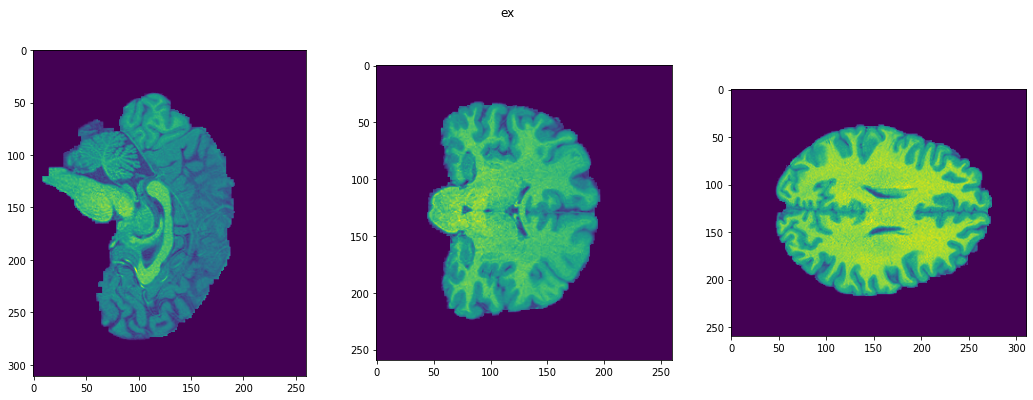

In [21]:
def plot_central_cuts(img, title="", t=None):
    """
    param image: tensor or np array of shape (CxDxHxW) if t is None
    param image: tensor or np array of shape (TxCxDxHxW) if t is not None
    """
    if t is not None:
        img = img[t]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3 * 6, 6))
    fig.suptitle(title)
    axes[0].imshow(img[0, img.shape[1] // 2, :, :])
    axes[1].imshow(img[0, :, img.shape[2] // 2, :])
    axes[2].imshow(img[0, :, :, img.shape[3] // 2])
    plt.show()
plot_central_cuts(nilearn.image.get_data(img)[np.newaxis,:], title="ex", t = None)

In [10]:
!ls /home/mri/datasets/adni

ADNI1			       data-20201014T170006Z-010.zip
data			       data-20201014T170006Z-011.zip
data-20201014T170006Z-001.zip  data-20201014T170006Z-012.zip
data-20201014T170006Z-002.zip  data-20201014T170006Z-013.zip
data-20201014T170006Z-003.zip  data-20201014T170006Z-014.zip
data-20201014T170006Z-004.zip  data-20201014T170006Z-015.zip
data-20201014T170006Z-005.zip  labels.npy
data-20201014T170006Z-006.zip  tensors_cut.npz
data-20201014T170006Z-007.zip  tensors.npz
data-20201014T170006Z-008.zip  unrestricted_hcp_freesurfer.csv
data-20201014T170006Z-009.zip


In [7]:
X = np.load('/home/mri/datasets/adni/tensors_cut.npz')
y = np.load('/home/mri/datasets/adni/labels.npy')

In [8]:
X = X.f.arr_0

In [9]:
# X = X[:, np.newaxis, :, :, :]
print(X.shape, y.shape)

(517, 1, 180, 180, 180) (517,)


In [45]:
class MriData(torch.utils.data.Dataset):
    def __init__(self, X, y, transform):
        super(MriData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y).long()
        self.transform = transform
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
#         sample = {'img': self.X[idx], 'landmarks': self.y[idx]}
#         if self.transform:
#                    sample = self.transform(sample)
        return self.X[idx], self.y[idx]

In [46]:
## Hidden layers 1, 2 and 3
hidden = lambda c_in, c_out: nn.Sequential(
    nn.Conv3d(c_in, c_out, (3,3,3)), # Convolutional layer
    nn.BatchNorm3d(c_out), # Batch Normalization layer
    nn.ReLU(), # Activational layer
    nn.MaxPool3d(3) # Pooling layer
)

class MriNet(nn.Module):
    def __init__(self, c):
        super(MriNet, self).__init__()
        self.hidden1 = hidden(1, c)
        self.hidden2 = hidden(c, 2*c)
        self.hidden3 = hidden(2*c, 4*c)
        self.hidden4 = hidden(4*c, 4*c)
        self.linear = nn.Linear(128, 2)#16000
#         self.linear = nn.Linear(128*5*5*5, 2)#16000
        self.flatten = nn.Flatten()

    def forward(self, x):
#         print(x.shape)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.hidden4(x)
#         print(x.shape)
        x = self.flatten(x)
        x = self.linear(x)
        
        x = F.log_softmax(x, dim=1)
        return x

torch.manual_seed(1)
np.random.seed(1)

c = 32
model = MriNet(c)

In [47]:
if torch.cuda.device_count() > 1:
      d_ids= [1,2,3,4]
      print("Let's use", d_ids, "GPUs!")
      # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
      model = nn.DataParallel(model, device_ids=d_ids)

model.to(device)

Let's use [1, 2, 3, 4] GPUs!


DataParallel(
  (module): MriNet(
    (hidden1): Sequential(
      (0): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
      (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
    (hidden2): Sequential(
      (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
      (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
    (hidden3): Sequential(
      (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1))
      (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
    (hidden4): Sequential(
      (0): Conv3d(128, 128, kernel_size=(3, 3, 3), st

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 
# transform = CropOrPad(
#      (180, 180, 180))
train_dataset = MriData(X_train, y_train, transform=None)
test_dataset = MriData(X_test, y_test, transform=None)
del X_train, X_test, y_train, y_test #deleting for freeing space on disc

In [49]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)#was 5  #45 - recommended value for batchsize
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False) 

In [50]:
CHECKPOINTS_DIR =  '/home/mri/Druzhinina/project/checkpoints/'

In [53]:
criterion = nn.NLLLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005) #return ADAM?
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=1)
# scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 15], gamma=0.1)

In [54]:
model_name = 'default'

In [63]:
# timing
from tqdm import tqdm

def get_accuracy(net, data_loader):
    net.eval()
    correct = 0
    for data, target in data_loader:
        data = data.to(device)
        target = target.to(device)

        out = net(data)
        pred = out.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()
        del data, target
    accuracy = 100. * correct / len(data_loader.dataset)
    return accuracy.item()

def get_loss(net, data_loader):
    net.eval()
    loss = 0 
    for data, target in data_loader:
        data = data.to(device)
        target = target.to(device)

        out = net(data)
        loss += criterion(out, target).item()*len(data)

        del data, target, out 

    return loss / len(data_loader.dataset)


def train(epochs, net, criterion, optimizer, train_loader, val_loader, scheduler=None, verbose=True, save=False, experiment= False):
    best_val_loss = 100000 #100_000
    best_val_acc = 0
    best_model = None
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []

    train_loss_list.append(get_loss(net, train_loader))
    val_loss_list.append(get_loss(net, val_loader))
    train_acc_list.append(get_accuracy(net, train_loader))
    val_acc_list.append(get_accuracy(net, val_loader))
    if verbose:
        print('Epoch {:02d}/{} || Loss:  Train {:.4f} | Validation {:.4f}'.format(0, epochs, train_loss_list[-1], val_loss_list[-1]))

    net.to(device)
    for epoch in tqdm(range(1, epochs+1)):
        net.train()
        for X, y in train_loader:
            # Perform one step of minibatch stochastic gradient descent
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            out = net(X)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            del X, y, out, loss #freeing gpu space
            
        
        # define NN evaluation, i.e. turn off dropouts, batchnorms, etc.
        net.eval()
        for X, y in val_loader:
            # Compute the validation loss
            X, y = X.to(device), y.to(device)
            out = net(X)
            del X, y, out #freeing gpu space
         
        train_loss_list.append(get_loss(net, train_loader))
        val_loss_list.append(get_loss(net, val_loader))
        train_acc_list.append(get_accuracy(net, train_loader))
        val_acc_list.append(get_accuracy(net, val_loader))
        
        if scheduler is not None:
            scheduler.step(val_acc_list[-1])

        if save and val_acc_list[-1] > best_val_acc:
            torch.save(net.state_dict(), CHECKPOINTS_DIR + 'best_acc_model_' + model_name)    
            best_val_acc = val_acc_list[-1]
            
        if save and val_loss_list[-1] < best_val_loss:
            torch.save(net.state_dict(), CHECKPOINTS_DIR + 'best_val_loss_model_' + model_name)
            best_val_loss = val_loss_list[-1]
            
        if save and epoch%10==0:
            torch.save(net.state_dict(), CHECKPOINTS_DIR + str(epoch) + '_epoch_model_' + model_name)
            
        freq = 1
        if verbose and epoch%freq==0:
            print('Epoch {:02d}/{} || Loss:  Train {:.4f} | Validation {:.4f}'.format(epoch, epochs, train_loss_list[-1], val_loss_list[-1]))
        if experiment:
                experiment.log_metric("train_loss", train_loss_list[-1])
                experiment.log_metric("validate_loss", val_loss_list[-1])
                experiment.log_metric("train_acc", train_acc_list[-1])
                experiment.log_metric("validate_acc", val_acc_list[-1])
                experiment.log_epoch_end(epoch)
    return train_loss_list, val_loss_list, train_acc_list, val_acc_list    

In [ ]:
experiment.set_name("3DCNN_baseline_Adam_5e-5_sch_05_2")

In [60]:
model_name = 'adam-4_sch'
experiment.set_name("3DCNN_baseline_Adam_5e-5_sch_05_2")

In [65]:
torch.manual_seed(1)
np.random.seed(1)
EPOCHS = 40

train_loss_list, val_loss_list, train_acc_list, val_acc_list = train(EPOCHS, model, criterion, optimizer, train_loader, val_loader, scheduler=scheduler, save=True, experiment= experiment) 

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 00/40 || Loss:  Train 0.2269 | Validation 0.2701


  2%|▎         | 1/40 [03:11<2:04:20, 191.28s/it]

Epoch 01/40 || Loss:  Train 0.1507 | Validation 0.2210


  5%|▌         | 2/40 [06:23<2:01:19, 191.57s/it]

Epoch 02/40 || Loss:  Train 0.1438 | Validation 0.2819


  8%|▊         | 3/40 [09:35<1:58:18, 191.84s/it]

Epoch 03/40 || Loss:  Train 0.0817 | Validation 0.1737


 10%|█         | 4/40 [12:47<1:55:05, 191.83s/it]

Epoch 04/40 || Loss:  Train 0.2019 | Validation 0.3322


 12%|█▎        | 5/40 [15:59<1:51:56, 191.90s/it]

Epoch 05/40 || Loss:  Train 0.1873 | Validation 0.4163


 15%|█▌        | 6/40 [19:11<1:48:46, 191.96s/it]

Epoch 06/40 || Loss:  Train 0.0068 | Validation 0.1428


 18%|█▊        | 7/40 [22:23<1:45:35, 191.98s/it]

Epoch 07/40 || Loss:  Train 0.0037 | Validation 0.1311


 20%|██        | 8/40 [25:36<1:42:25, 192.06s/it]

Epoch 08/40 || Loss:  Train 0.0013 | Validation 0.1446


 22%|██▎       | 9/40 [28:48<1:39:14, 192.09s/it]

Epoch 09/40 || Loss:  Train 0.0010 | Validation 0.1537


 25%|██▌       | 10/40 [32:01<1:36:04, 192.16s/it]

Epoch 10/40 || Loss:  Train 0.0009 | Validation 0.1907


 28%|██▊       | 11/40 [35:14<1:32:53, 192.19s/it]

Epoch 11/40 || Loss:  Train 0.0007 | Validation 0.1586


 30%|███       | 12/40 [38:25<1:29:40, 192.17s/it]

Epoch 12/40 || Loss:  Train 0.0010 | Validation 0.1410


 32%|███▎      | 13/40 [41:38<1:26:29, 192.21s/it]

Epoch 13/40 || Loss:  Train 0.0008 | Validation 0.1548


 35%|███▌      | 14/40 [44:51<1:23:18, 192.25s/it]

Epoch 14/40 || Loss:  Train 0.0008 | Validation 0.1554


 38%|███▊      | 15/40 [48:04<1:20:07, 192.29s/it]

Epoch 15/40 || Loss:  Train 0.0007 | Validation 0.1611


 40%|████      | 16/40 [51:16<1:16:54, 192.26s/it]

Epoch 16/40 || Loss:  Train 0.0006 | Validation 0.1949


 42%|████▎     | 17/40 [54:28<1:13:41, 192.25s/it]

Epoch 17/40 || Loss:  Train 0.0006 | Validation 0.1629


 45%|████▌     | 18/40 [57:40<1:10:29, 192.24s/it]

Epoch 18/40 || Loss:  Train 0.0008 | Validation 0.1586


 48%|████▊     | 19/40 [1:00:53<1:07:17, 192.27s/it]

Epoch 19/40 || Loss:  Train 0.0007 | Validation 0.1700


 50%|█████     | 20/40 [1:04:05<1:04:05, 192.28s/it]

Epoch 20/40 || Loss:  Train 0.0005 | Validation 0.1735


 52%|█████▎    | 21/40 [1:07:17<1:00:53, 192.28s/it]

Epoch 21/40 || Loss:  Train 0.0007 | Validation 0.1453


 55%|█████▌    | 22/40 [1:10:30<57:41, 192.29s/it]  

Epoch 22/40 || Loss:  Train 0.0007 | Validation 0.1563


 57%|█████▊    | 23/40 [1:13:42<54:29, 192.30s/it]

Epoch 23/40 || Loss:  Train 0.0008 | Validation 0.1417


 60%|██████    | 24/40 [1:16:55<51:17, 192.32s/it]

Epoch 24/40 || Loss:  Train 0.0007 | Validation 0.1557


 62%|██████▎   | 25/40 [1:20:07<48:04, 192.30s/it]

Epoch 25/40 || Loss:  Train 0.0009 | Validation 0.1533


 65%|██████▌   | 26/40 [1:23:20<44:52, 192.31s/it]

Epoch 26/40 || Loss:  Train 0.0007 | Validation 0.1523


 68%|██████▊   | 27/40 [1:26:32<41:40, 192.32s/it]

Epoch 27/40 || Loss:  Train 0.0005 | Validation 0.1628


 70%|███████   | 28/40 [1:29:45<38:27, 192.33s/it]

Epoch 28/40 || Loss:  Train 0.0007 | Validation 0.1775


 72%|███████▎  | 29/40 [1:32:57<35:15, 192.34s/it]

Epoch 29/40 || Loss:  Train 0.0006 | Validation 0.1497


 75%|███████▌  | 30/40 [1:36:10<32:03, 192.35s/it]

Epoch 30/40 || Loss:  Train 0.0006 | Validation 0.1520


 78%|███████▊  | 31/40 [1:39:22<28:51, 192.34s/it]

Epoch 31/40 || Loss:  Train 0.0007 | Validation 0.1425


 80%|████████  | 32/40 [1:42:34<25:38, 192.33s/it]

Epoch 32/40 || Loss:  Train 0.0008 | Validation 0.1685


 82%|████████▎ | 33/40 [1:45:46<22:26, 192.31s/it]

Epoch 33/40 || Loss:  Train 0.0007 | Validation 0.1521


 85%|████████▌ | 34/40 [1:48:58<19:13, 192.31s/it]

Epoch 34/40 || Loss:  Train 0.0008 | Validation 0.1465


 88%|████████▊ | 35/40 [1:52:11<16:01, 192.33s/it]

Epoch 35/40 || Loss:  Train 0.0008 | Validation 0.1616


 90%|█████████ | 36/40 [1:55:24<12:49, 192.33s/it]

Epoch 36/40 || Loss:  Train 0.0008 | Validation 0.1566


 92%|█████████▎| 37/40 [1:58:36<09:37, 192.34s/it]

Epoch 37/40 || Loss:  Train 0.0004 | Validation 0.1762


 95%|█████████▌| 38/40 [2:01:48<06:24, 192.33s/it]

Epoch 38/40 || Loss:  Train 0.0007 | Validation 0.1740


 98%|█████████▊| 39/40 [2:05:01<03:12, 192.35s/it]

Epoch 39/40 || Loss:  Train 0.0007 | Validation 0.1617


100%|██████████| 40/40 [2:08:14<00:00, 192.35s/it]

Epoch 40/40 || Loss:  Train 0.0008 | Validation 0.1478


In [64]:
torch.cuda.empty_cache()

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.title('Loss history', fontsize=18)
plt.plot(train_loss_list[1:], label='Train')
plt.plot(val_loss_list[1:], label='Validation')
plt.xlabel('# of epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=16)
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Accuracy history', fontsize=18)
plt.plot(train_acc_list, label='Train')
plt.plot(val_acc_list, label='Validation')
plt.xlabel('# of epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.grid()

In [34]:
model.load_state_dict(torch.load(CHECKPOINTS_DIR+'best_model_lr'))
model.eval()

DataParallel(
  (module): MriNet(
    (hidden1): Sequential(
      (0): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
      (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
    (hidden2): Sequential(
      (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
      (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
    (hidden3): Sequential(
      (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1))
      (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
    (hidden4): Sequential(
      (0): Conv3d(128, 128, kernel_size=(3, 3, 3), st

In [35]:
get_accuracy(model, val_loader)

90.38461303710938

In [23]:
!ls /home/Druzhinina/project/checkpoints/

ls: cannot access '/home/Druzhinina/project/checkpoints/': No such file or directory


In [ ]:
# execute for ~ 5 min
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cross_vall_acc_list = []
j = 0

for train_index, test_index in skf.split(X, y):
    print('Doing {} split'.format(j))
    j += 1

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_dataset = MriData(X_train, y_train)
    test_dataset = MriData(X_test, y_test)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=45, shuffle=True)  #45 - recommended value for batchsize
    val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=28, shuffle=False) 
    
    torch.manual_seed(1)
    np.random.seed(1)

    c = 32
    model = MriNet(c).to(device)
    criterion = nn.NLLLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 15], gamma=0.1)

    train(EPOCHS, model, criterion, optimizer, train_loader, val_loader, scheduler=scheduler, save=False, verbose=False) 
    cross_vall_acc_list.append(get_accuracy(model, val_loader))


In [ ]:
print('Average cross-validation accuracy (3-folds):', sum(cross_vall_acc_list)/len(cross_vall_acc_list))